**Notebook Objective**

The goal of this phase is to develop a solid data preprocessing pipeline for a hotel booking cancellation prediction project.  
Since last-minute cancellations reduce profitability, the revenue team requires reliable data preparation before proceeding to modeling.  
At this stage, the focus is not on building the prediction model itself, but on transforming the raw data into a clean and well-structured format that will enable future modeling success.



**Column Explanations and Data Types**

| Column Name                    | Definition                                                                                                                                   | Data Type      |
| :----------------------------- | :------------------------------------------------------------------------------------------------------------------------------------------- | :------------- |
| **hotel**                      | Type of hotel (e.g., Resort Hotel, City Hotel).                                                                                              | `object`       |
| **is_canceled**                | Indicates if the booking was canceled (1) or not (0).                                                                                        | `int64`        |
| **lead_time**                  | Number of days between the booking date and the arrival date.                                                                                | `int64`        |
| **arrival_date_year**          | Year of arrival date.                                                                                                                        | `int64`        |
| **arrival_date_month**         | Month of arrival date.                                                                                                                       | `object`       |
| **arrival_date_week_number**   | Week number of year for arrival date.                                                                                                        | `int64`        |
| **arrival_date_day_of_month**  | Day of arrival date.                                                                                                                         | `int64`        |
| **stays_in_weekend_nights**    | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel.                                               | `int64`        |
| **stays_in_week_nights**       | Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel.                                                  | `int64`        |
| **adults**                     | Number of adults.                                                                                                                            | `int64`        |
| **children**                   | Number of children.                                                                                                                          | `float64`      |
| **babies**                     | Number of babies.                                                                                                                            | `int64`        |
| **meal**                       | Type of meal booked.                                                                                                                         | `object`       |
| **country**                    | Country of origin.                                                                                                                           | `object`       |
| **market_segment**             | Market segment designation.                                                                                                                | `object`       |
| **distribution_channel**       | Booking distribution channel.                                                                                                                | `object`       |
| **is_repeated_guest**          | Indicates if the booking was from a repeated guest (1) or not (0).                                                                           | `int64`        |
| **previous_cancellations**     | Number of previous bookings that were canceled by the customer prior to the current booking.                                                 | `int64`        |
| **previous_bookings_not_canceled** | Number of previous bookings not canceled by the customer prior to the current booking.                                                     | `int64`        |
| **reserved_room_type**         | Code of room type reserved.                                                                                                                  | `object`       |
| **assigned_room_type**         | Code of room type assigned.                                                                                                                  | `object`       |
| **booking_changes**            | Number of changes made to the booking from the moment it was entered on the PMS until the moment of check-in or cancellation.                | `int64`        |
| **deposit_type**               | Type of deposit made for the booking.                                                                                                        | `object`       |
| **agent**                      | ID of the travel agency that made the booking.                                                                                               | `float64`      |
| **company**                    | ID of the company/entity that made the booking or responsible for paying the booking.                                                        | `float64`      |
| **days_in_waiting_list**       | Number of days the booking was in the waiting list before it was confirmed.                                                                  | `int64`        |
| **customer_type**              | Type of customer, assuming one of four categories.                                                                                         | `object`       |
| **adr**                        | Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights.                         | `float64`       |
| **required_car_parking_spaces**| Number of required car parking spaces.                                                                                                       | `int64`        |
| **total_of_special_requests**  | Number of special requests made by the customer.                                                                                             | `int64`        |
| **reservation_status**         | Reservation status (Canceled, Check-Out, No-Show).                                                                                           | `object`       |
| **reservation_status_date**    | Date at which the reservation status was set.                                                                                                | `object`       |

# Data Loading

In [465]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from google.colab import files
import missingno as msno
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [447]:
#uploaded = files.upload()

In [448]:
# load dataframe
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Exploratory Data Analysis (EDA)

## Summary Statistics

In [449]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [450]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Summary Statistics Analysis

- Many column data types are not correct.
- Dataframe columns could be reduced.
- Many columns are highly skewed and have non-realistic values.

## Identify Missing Values

In this step, I will begin by identifying all missing values in the dataset and summarizing them by column. To better understand the extent and distribution of missing data, I will create visualizations such as heatmap.

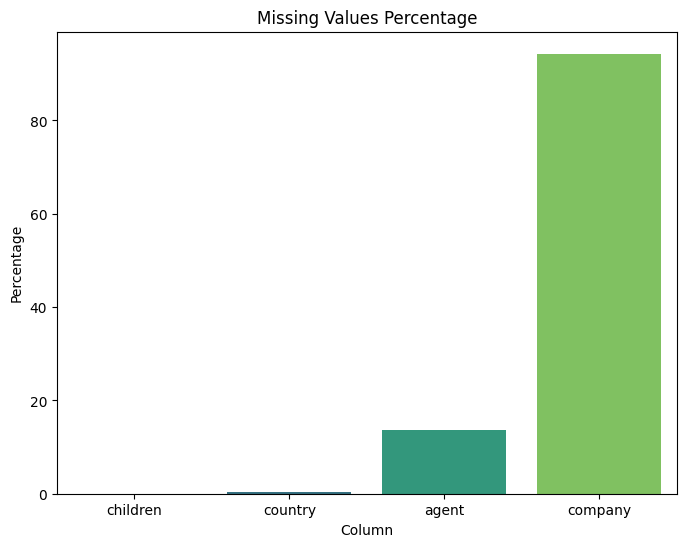

In [451]:
# identifying columns with missing values
missing_counts = df.isnull().sum()
missing_summary  = pd.DataFrame({'Column': missing_counts.index, 'Missing Values': missing_counts.values})
missing_percentage = missing_counts[missing_counts > 0] * 100 / len(df)

# plot missing values percentage
plt.figure(figsize=(8,6))
plt.title('Missing Values Percentage')
sns.barplot(x=missing_percentage.index, y=missing_percentage.values, palette='viridis')
plt.xlabel('Column')
plt.ylabel('Percentage')
plt.show()

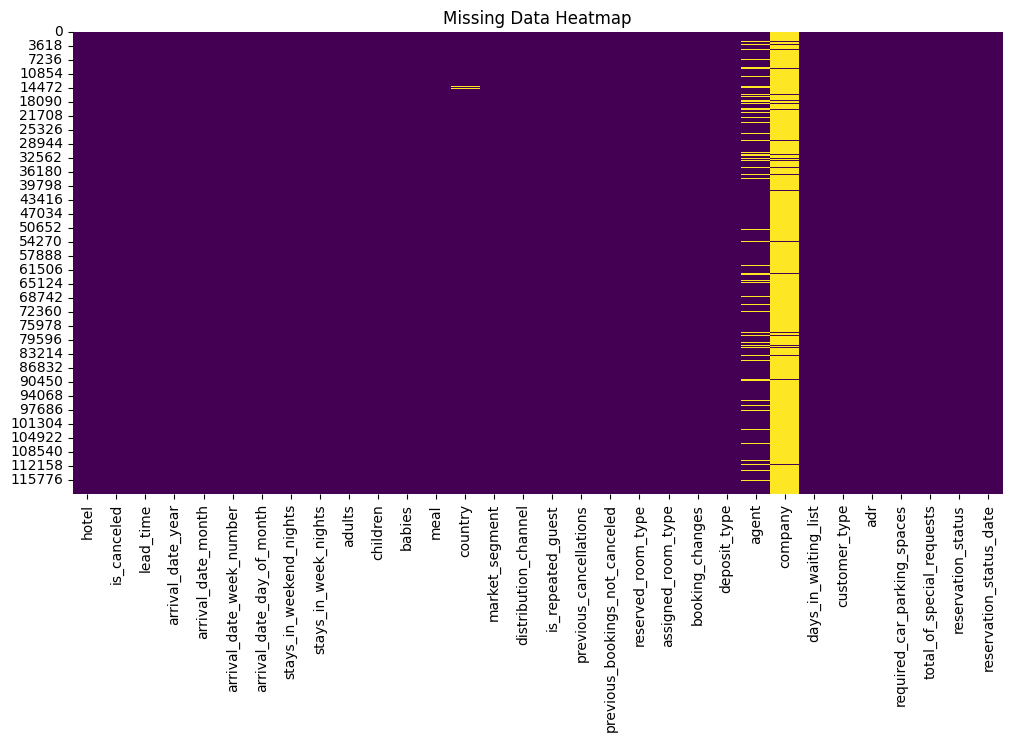

In [452]:
#missing values distribution
plt.figure(figsize=(12,6))
plt.title("Missing Data Heatmap")
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.show()

### Missing Data Analysis

- **children**: 0.003% missing  
- **country**: 0.408% missing  
- **agent**: 13.68% missing  
- **company**: 94.30% missing  

**Findings:**  
- Several columns contain missing values, with `company` having the highest.  
- The visualization shows that missingness is random across all cases.
- In `agent` field, the missing values refer to **no agent (personal booking)**.   

**Possible Treatments:**  
- Impute small proportions (e.g., `children`, `country`).  
- Drop or mark as unknown where large portions are missing (e.g., `company`).  
- Decide based on business value whether to keep or remove columns like `agent` and `company`.  



## Outliers Detect

I will detect potential outliers in key numerical columns (such as adr and lead_time) using boxplots. To ensure a systematic approach, I will apply the Interquartile Range (IQR) method, which helps identify values that fall significantly outside the normal range.

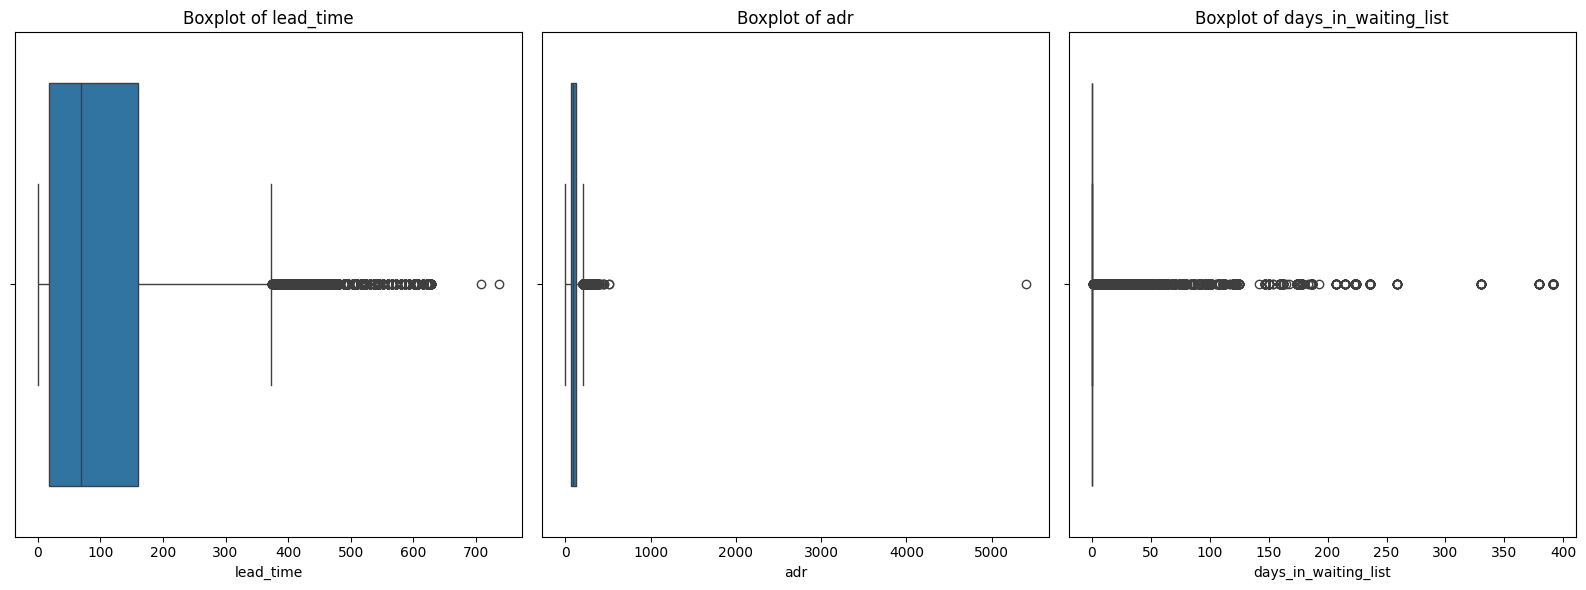

In [453]:
# Key numerical columns
numerical_columns = ['lead_time','adr','days_in_waiting_list']
# boxplot for outliers
# because of different scales in cloumns we will plot them seperated and collect them in one figure
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [454]:
# iqr function to simplify outliers detection
def iqr_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    # return dictinary of results
    return {
        "Column": column,
        "Q1": Q1,
        "Q3": Q3,
        "IQR": IQR,
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Outliers Count": len(outliers),
        'outliers_percentage': len(outliers) / len(data) * 100
    }

# Apply to columns
results = []
for col in ["lead_time", "adr", "days_in_waiting_list"]:
    results.append(iqr_outliers(df, col))

pd.DataFrame(results)


,Column,Q1,Q3,IQR,Lower Bound,Upper Bound,Outliers Count,outliers_percentage
0,lead_time,18.00,160.0,142.00,-195.000,373.000,3005,2.516961
1,adr,69.29,126.0,56.71,-15.775,211.065,3793,3.176983
2,days_in_waiting_list,0.00,0.0,0.00,0.000,0.000,3698,3.097412


### Outlier Summary Analysis

The analysis shows:

- **Lead Time**: Most bookings fall between 18 and 160 days, but about **2.5%** are above 373 days.  
- **ADR**: Normal values are between 69 and 126, while **3.2%** of records are above 211, **with some extremely high and unrealistic values**.  
- **Days in Waiting List**: Most bookings are zero, but **3.1%** **have unusually long waiting times**. the vast majority are 0 days wait, so instead of using this feature, we could create a binary feature `is_in_wating_list` instead of it.

**Significance:**  
These outliers can distort analysis and reduce model accuracy.  

**Possible Treatments:**  
- Cap extreme values within limits.  
- Remove unusual records if not useful.  
- Apply transformations (e.g., log scale) to reduce their impact.  


## Conclusion

The dataset presents two main quality issues: missing values and outliers.  
Several columns, such as `children` and `country`, have very small amounts of missing data that can be easily imputed. Others, like `agent`, show moderate levels of missingness, while `company` has more than 94% missing values, making it less useful for analysis.  

Outlier detection also revealed that a small but notable percentage of records fall outside the normal range. For example, some bookings have lead times above 373 days, ADR values far above 211 (with extreme unrealistic cases), and waiting list days extending beyond 300, even though most bookings are confirmed immediately.  

These issues are significant because they can bias statistical summaries, distort model training, and reduce prediction accuracy. Addressing them through appropriate preprocessing steps such as imputation, capping, transformation, or removal will improve the reliability of the dataset and support the success of the hotel booking cancellation prediction model.  


# Data Cleaning

## Handling Missing Values

In [455]:
# remove company cloumn (missing values %94)
df.drop(columns=['company'],inplace=True)


In [456]:
# For the agent column, missing values mean that the person didn't use agent
df['agent'].fillna(0, inplace=True) # 0 -> Direct booking


In [457]:
# For the children column, we could impute with the mode
df['children'].fillna(df['children'].mode()[0], inplace=True)
# why mode not median or mean:
# because children's total number is a discrete variable, not continuous

In [458]:
# For the country column, we could impute with a new category -> other
# Why other-> because in feature engineering, we will group all countries with
# small counts to now category -> other
df['country'].fillna('other', inplace=True)

In [459]:
# checking missing values
df.isna().sum().sort_values(ascending=False).head(2) # sorting descending

,0
hotel,0
is_canceled,0


## Handling Duplicates

In [417]:
# inspecting duplicates
print(f"Total duplicated recordes: {df.duplicated().sum()}")
# inspect duplicated rows
df[df.duplicated(keep=False)].head(6)

Total duplicated recordes: 32001


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
21,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,1,No Deposit,250.0,0,Transient,84.67,0,1,Check-Out,2015-07-07
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,1,No Deposit,250.0,0,Transient,84.67,0,1,Check-Out,2015-07-07
39,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,0,No Deposit,250.0,0,Transient,137.00,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,0,No Deposit,250.0,0,Transient,137.00,0,1,Check-Out,2015-07-07


In [418]:
df[df.duplicated(keep=False)].tail(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119372,City Hotel,0,175,2017,August,35,31,1,3,1,...,0,No Deposit,42.0,0,Transient,82.35,0,1,Check-Out,2017-09-04
119373,City Hotel,0,175,2017,August,35,31,1,3,1,...,0,No Deposit,42.0,0,Transient,82.35,0,1,Check-Out,2017-09-04


**Findings: Duplicate Records**

- The dataset contains 32,001 fully duplicated rows.

- These duplicates likely come from the data collection or merging process.

- They can bias results by over-representing certain bookings.

- Since they are exact matches, they can be safely removed.







In [419]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [420]:
# Outliers handling:
# strating by adr column
df[df['adr']>=1000] # this record is non-realistic should be droped

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
48515,City Hotel,1,35,2016,March,13,25,0,1,2,...,1,Non Refund,12.0,0,Transient,5400.0,0,0,Canceled,2016-02-19


## Reduce categorical Classes

In [421]:
df['market_segment'].value_counts() # remove rows with undefined values

,count
market_segment,
Online TA,51615
Offline TA/TO,13889
Direct,11804
Groups,4942
Corporate,4208
Complementary,702
Aviation,227
Undefined,2


In [422]:
marked_remove = df[df['market_segment']=='Undefined'].index
df.drop(marked_remove, inplace=True)

In [423]:
df['distribution_channel'].value_counts() # remove undefiend values

,count
distribution_channel,
TA/TO,69138
Direct,12988
Corporate,5077
GDS,181
Undefined,3


In [424]:
distribution_remove = df[df['distribution_channel']=='Undefined'].index
df.drop(distribution_remove,inplace = True)

# Handling Outliers

In [425]:
df.drop(df[df['adr']>=1000].index, inplace=True)

**Outlier Handling for ADR**

Instead of using the IQR rule (upper limit ≈ 220), we decided to cap ADR values at **400**.  
The reason is that ADR values between 220 and 400 can still represent realistic business cases,  
such as luxury rooms or peak-season bookings.  

- **IQR capping (220):** too strict, may remove valid high prices.  
- **Capping at 400:** keeps meaningful high values, only limits extreme unrealistic records.  

This approach balances data cleaning with keeping important business information.


In [426]:
# capping adr at 400
df['adr'] = df['adr'].apply(lambda x: 400 if x > 400 else x)

In [427]:
# lead_time column:
# In the hotel booking domain, it's possible to book a lead time that could reach 365 days for
# weddings, conference, etc, but values above are rare, so we will cap to 365
df['lead_time'] = df['lead_time'].apply(lambda x: 365 if x >365 else x)

By observation best value to cap

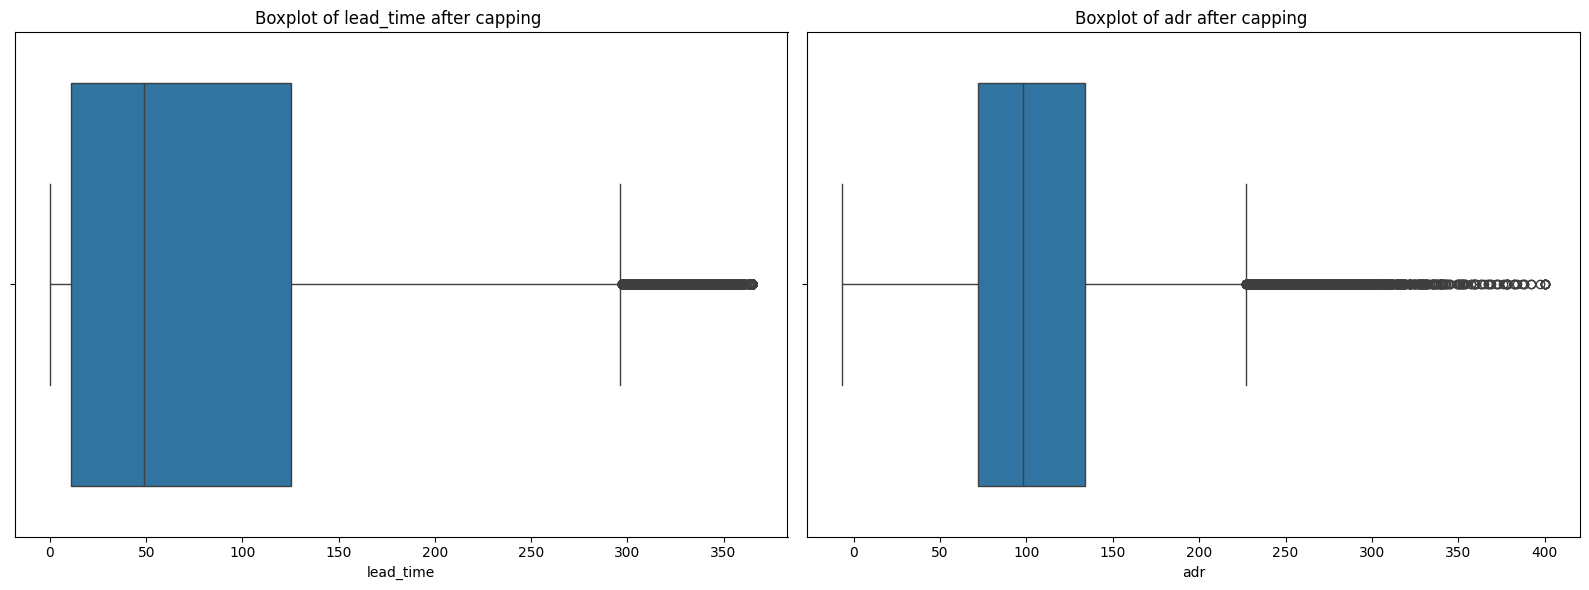

In [428]:
# Key numerical columns
numerical_columns = ['lead_time','adr']
# boxplot for outliers
# because of different scales in cloumns we will plot them seperated and collect them in one figure
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column} after capping ')
plt.tight_layout()
plt.show()

**Outliers Capping Findings**
The capping in the `lead_time` and `adr` columns is proper and functional
But also, it's observed that both columns are **right skewed**, which may need a transformation like logarithmic.


## Handling Data Types

In [429]:
#fixing data types
#review data types in the **summary statistics** section
df['children'] = df['children'].astype('int64')
df['agent'] = df['agent'].astype('int64')
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87383 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87383 non-null  object        
 1   is_canceled                     87383 non-null  int64         
 2   lead_time                       87383 non-null  int64         
 3   arrival_date_year               87383 non-null  int64         
 4   arrival_date_month              87383 non-null  object        
 5   arrival_date_week_number        87383 non-null  int64         
 6   arrival_date_day_of_month       87383 non-null  int64         
 7   stays_in_weekend_nights         87383 non-null  int64         
 8   stays_in_week_nights            87383 non-null  int64         
 9   adults                          87383 non-null  int64         
 10  children                        87383 non-null  int64         
 11  babies

# Feature Engineering & Preprocessing

## Drop Data Leakage features


In [430]:
df.drop(columns=['reservation_status','reservation_status_date'],inplace=True)

## Feature Engineering

**Reduce country high cardinality**
My role is grouping countries that appear less than **2%** of the data set into "other", and keeping the highly frequent countries.


In [431]:
# countries frequancey propotion
countries = df['country'].value_counts(normalize=True)
countries =  countries[countries>0.02] # after setting our threshold
countries

,proportion
country,
PRT,0.314054
GBR,0.119382
FRA,0.101130
ESP,0.082991
DEU,0.061648
ITA,0.035087
IRL,0.034515
BEL,0.023815
BRA,0.022831


In [432]:
# apply the threshold
df['country'] = df['country'].apply(lambda x : "other" if x not in countries.index else x)

Text(0, 0.5, 'Percentage')

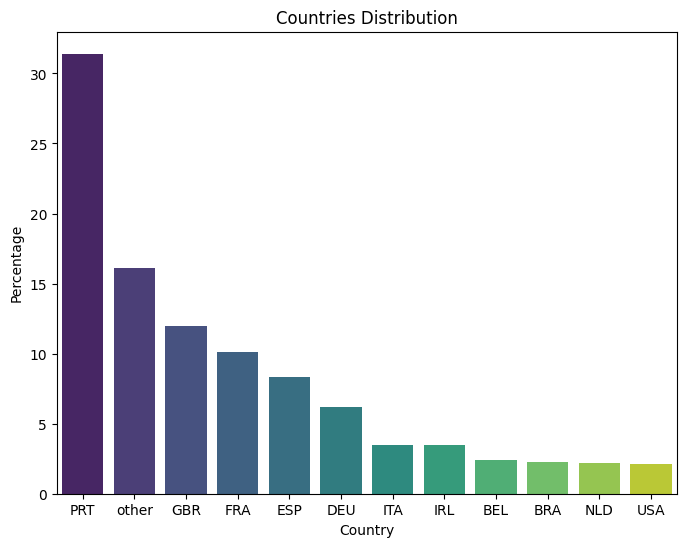

In [433]:
# plot countries distribution
countries_dis = df['country'].value_counts(normalize = True) *100
plt.figure(figsize=(8,6))
plt.title('Countries Distribution')
sns.barplot(x=countries_dis.index, y=countries_dis.values, palette='viridis')
plt.xlabel('Country')
plt.ylabel('Percentage')

From both `previous_cancellations ` -> customer risk profile,
and `previous_bookings_not_canceled` -> customer loyalty profile, we could calculate the customer `cancellation_ratio`. That will help us determine whether this customer is likely to cancel or not.

In [434]:
df['cancelation_ratio'] = df['previous_cancellations']/(df['previous_cancellations']+
                                                       df['previous_bookings_not_canceled'] +1e-5)
# add 1e-5 to nomenator to prevent deviding by 0

From `reserved_room_type` and `assigned_room_type` columns. I will create a binary flag `assigned_reserved_room`.
But here is the risk of **data leakage**, so if the assigned room wasn't known before cancelling, it's safe; otherwise, remove `assigned_reserved_room` and the feature generated.

In [435]:
df['assigned_reserved_room'] = (df['reserved_room_type'] == df['assigned_room_type']).astype(int)
df['assigned_reserved_room'].value_counts()

,count
assigned_reserved_room,
1,74277
0,13106


As we observied from **outliers section** we will create a binary flag to `days_in_waiting_list' column as the majority is 0 and any thing else is assigned as outlier


In [436]:
df['is_in_waiting_list'] = df['days_in_waiting_list'].apply(lambda x:1 if x>=1 else 0)
df['is_in_waiting_list'].value_counts()

,count
is_in_waiting_list,
0,86523
1,860


In [437]:
# creat `total_nights` column
df['total_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
# Drop orginal columns


In [438]:
# create `total_gustes` column
df['totla_gustes'] = df['adults'] + df['children'] + df['babies']
# Drop orginal columns
df['is_family'] = df[['children', 'babies']].any(axis=1).astype(int)


In [439]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87383 entries, 0 to 119389
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87383 non-null  object 
 1   is_canceled                     87383 non-null  int64  
 2   lead_time                       87383 non-null  int64  
 3   arrival_date_year               87383 non-null  int64  
 4   arrival_date_month              87383 non-null  object 
 5   arrival_date_week_number        87383 non-null  int64  
 6   arrival_date_day_of_month       87383 non-null  int64  
 7   stays_in_weekend_nights         87383 non-null  int64  
 8   stays_in_week_nights            87383 non-null  int64  
 9   adults                          87383 non-null  int64  
 10  children                        87383 non-null  int64  
 11  babies                          87383 non-null  int64  
 12  meal                            8738

## Features Redundant Check

In [440]:

# Select only numeric features
num_features = df.select_dtypes(include=['int64', 'float64'])
# Variance Inflation Factor (VIF)
# Add constant for VIF calculation

X = add_constant(num_features)
vif_data = pd.DataFrame()
vif_data["Feature"] = num_features.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i+1) for i in range(len(num_features.columns))]

print("Variance Inflation Factor (VIF):")
print(vif_data.sort_values(by="VIF", ascending=False))

Variance Inflation Factor (VIF):
                           Feature       VIF
8                         children       inf
6             stays_in_week_nights       inf
7                           adults       inf
5          stays_in_weekend_nights       inf
9                           babies       inf
23                    totla_gustes       inf
22                    total_nights       inf
24                       is_family  7.519593
15            days_in_waiting_list  2.309339
21              is_in_waiting_list  2.307441
2                arrival_date_year  1.670469
11          previous_cancellations  1.552633
3         arrival_date_week_number  1.549874
12  previous_bookings_not_canceled  1.467789
16                             adr  1.437607
19               cancelation_ratio  1.408124
10               is_repeated_guest  1.330409
1                        lead_time  1.319368
0                      is_canceled  1.197555
20          assigned_reserved_room  1.112194
18       total_of_spec

before deciding which redundant features to remove let's see features importance model.

In [441]:
df_copy = df.drop(columns=['reserved_room_type','assigned_room_type'])

In [442]:
df_copy = pd.get_dummies(df_copy, drop_first=True)

# Separate features and target
X = df_copy.drop(columns=['is_canceled'])   # Target column
y = df_copy['is_canceled']

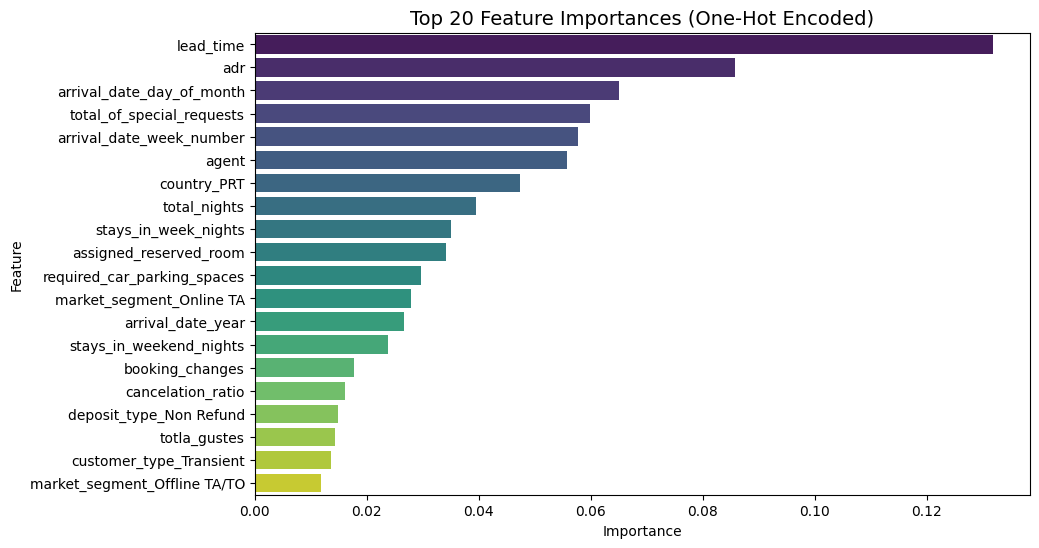

In [443]:
model = RandomForestClassifier(random_state=42, n_estimators=200)
model.fit(X, y)

# Get feature importances
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot top 20 features
plt.figure(figsize=(10,6))
sns.barplot(data=importances.head(20), x='Importance', y='Feature', palette='viridis')
plt.title("Top 20 Feature Importances (One-Hot Encoded)", fontsize=14)
plt.show()

### Redundant Features Remove



- `babies`, `children`, `adults`: replaced by derived features (`total_guests`, `is_family`) with higher importance, and avoiding redundancy.  
- `reserved_room_type`, `assigned_room_type`: replaced by `assigned_reserved_room` to avoid redundancy.  
- `days_in_waiting_list` replaced by `is_in_waiting_list` with higher importance, and avoiding redundancy.
- `previous_cancellations`, `previous_bookings_not_canceled` replaced by `cancelation_ratio` with higher importance, and avoiding redundancy.  
- `arrival_date_year`, `arrival_date_month`: low predictive value; seasonality captured by `arrival_date_day_of_month`.  

These removals reduce redundancy, multicollinearity, and keep only the most informative features.  


In [444]:
df.drop(columns=['reserved_room_type','assigned_room_type','days_in_waiting_list',
                 'stays_in_weekend_nights','stays_in_week_nights','children',
                 'babies','children','adults','arrival_date_month','arrival_date_year',
                 'previous_cancellations','previous_bookings_not_canceled'
                 ],inplace=True)

In [445]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87383 entries, 0 to 119389
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        87383 non-null  object 
 1   is_canceled                  87383 non-null  int64  
 2   lead_time                    87383 non-null  int64  
 3   arrival_date_week_number     87383 non-null  int64  
 4   arrival_date_day_of_month    87383 non-null  int64  
 5   meal                         87383 non-null  object 
 6   country                      87383 non-null  object 
 7   market_segment               87383 non-null  object 
 8   distribution_channel         87383 non-null  object 
 9   is_repeated_guest            87383 non-null  int64  
 10  booking_changes              87383 non-null  int64  
 11  deposit_type                 87383 non-null  object 
 12  agent                        87383 non-null  int64  
 13  customer_type       

## One-hot Encoding for categorical variables

In [460]:
df_encoded = pd.get_dummies(df, drop_first=True)

## Target Variable Calsses Check

In [461]:
df_encoded['is_canceled'].value_counts(normalize=True)

,proportion
is_canceled,
0,0.629584
1,0.370416


**Class Imbalance Analysis**

The target variable `is_canceled` shows imbalance:  
- Not Canceled (0): **62.9%**  
- Canceled (1): **37.0%**  

Although the imbalance is moderate, it may affect model performance, especially recall for minority class (canceled).  

**Possible Treatments**
- **Resampling Methods**  
  - Oversample minority class (SMOTE, Random Oversampling).  
  - Undersample majority class.  

- **Class Weight Adjustment**  
  - Use algorithms that support `class_weight` (e.g., Logistic Regression, Random Forest, XGBoost).  

- **Advanced Methods**  
  - Ensemble techniques with balanced bagging.  
  - Anomaly detection approaches if cancellations are treated as rare events.  

Balancing techniques should be tested to ensure improved performance without overfitting.  



## Data Spliting

In [462]:
X = df_encoded.drop(columns=['is_canceled'])
y = df_encoded['is_canceled']

In [466]:
# split into trian and test sets with stratified spliting to target column
X_trian,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

Upcoming work, after splitting now we ready for feature scaling and transformation, depending on our strategies and the model that we will build.

## Conclusion of Data Preprocessing

This notebook has focused on the critical initial phase of data preprocessing for the hotel booking cancellation prediction project. The key steps undertaken include:

1.  **Data Loading and Initial Inspection**: The hotel booking data was loaded into a pandas DataFrame, and initial summary statistics and data types were examined, revealing issues with missing values, incorrect data types, and the presence of outliers and duplicates.

2.  **Handling Missing Values**: Missing values in columns like `children`, `country`, `agent`, and `company` were identified and addressed. The `company` column, with a high percentage of missing values, was dropped. Missing values in `agent` were imputed as 0 (indicating no agent), `children` with the mode, and `country` with a new category 'other'.

3.  **Handling Duplicates**: A significant number of duplicate rows were identified and removed from the dataset to avoid biasing the analysis and modeling.

4.  **Handling Outliers**: Outliers in numerical columns such as `lead_time` and `adr` were detected using boxplots and the IQR method. Extreme values in `adr` were capped at 400, and `lead_time` was capped at 365 to handle unrealistic entries while preserving plausible high values.

5.  **Handling Categorical Features**: Categories with very low frequency in `market_segment` and `distribution_channel` were removed. High cardinality in the `country` column was reduced by grouping less frequent countries into an 'other' category.

6.  **Feature Engineering**: New features were engineered to capture more informative aspects of the data:
    *   `cancelation_ratio`: calculated from previous cancellations and non-cancellations to indicate customer risk.
    *   `assigned_reserved_room`: a binary flag indicating if the assigned room matched the reserved room.
    *   `is_in_waiting_list`: a binary flag derived from `days_in_waiting_list`.
    *   `total_nights`: the sum of weekend and week nights.
    *   `total_guests`: the sum of adults, children, and babies.
    *   `is_family`: a binary flag indicating if the booking includes children or babies.

7.  **Handling Data Types**: Data types for columns like `children`, `agent`, and `reservation_status_date` were corrected.

8.  **Feature Selection**: Data leakage features (`reservation_status`, `reservation_status_date`) were dropped. Redundant features identified through VIF analysis and feature importance from a RandomForest model (including original columns replaced by engineered features and low-importance features) were removed.

9.  **Encoding Categorical Variables**: Categorical variables were one-hot encoded to prepare them for modeling.

10. **Target Variable Analysis**: The distribution of the target variable `is_canceled` was examined, revealing a moderate class imbalance.

11. **Data Splitting**: The dataset was split into training and testing sets using stratified sampling to ensure the class distribution of the target variable is maintained in both sets.

Overall, the preprocessing pipeline has successfully cleaned the data, handled missing values and outliers, reduced dimensionality by removing redundant features, engineered new informative features, and prepared the data for the next stage of modeling by encoding categorical variables and splitting the dataset. The resulting dataset is now in a much better state to build a reliable hotel booking cancellation prediction model.

# Hotel Booking Cancellation Prediction

## Introduction

This project aims to develop a reliable data preprocessing pipeline and a predictive model for hotel booking cancellations. By accurately predicting cancellations, hotels can better manage their resources, optimize revenue, and reduce losses associated with last-minute changes. The focus of this initial phase is on transforming raw booking data into a clean, structured, and informative dataset suitable for machine learning model development.

## Data

The dataset used in this project contains historical hotel booking information. Key features include booking details (lead time, arrival dates, length of stay), guest demographics (adults, children, babies, country of origin), booking specifics (meal plan, market segment, distribution channel, repeated guest status), previous booking history (cancellations, non-cancellations), room information (reserved and assigned room types), booking changes, deposit type, agent and company information, waiting list days, average daily rate (ADR), required parking spaces, and special requests. The target variable is `is_canceled`, indicating whether a booking was canceled (1) or not (0).

Detailed column descriptions and data types are provided in the notebook.

## Methodology

The data preprocessing pipeline involved several crucial steps:

1.  **Data Loading and Initial Exploration**: The dataset was loaded and examined to understand its structure, identify data types, and get initial summary statistics.
2.  **Handling Missing Values**: Missing data in columns such as `children`, `country`, `agent`, and `company` were identified and addressed through imputation or removal based on the extent of missingness and potential relevance.
3.  **Handling Duplicates**: Duplicate booking records were identified and removed to ensure data integrity and prevent bias.
4.  **Outlier Detection and Treatment**: Potential outliers in numerical features like `lead_time` and `adr` were visualized and analyzed using the IQR method. Outliers were treated by capping extreme values to plausible limits based on business context.
5.  **Handling Categorical Features**: Low-frequency categories in certain columns were managed, and high-cardinality features like `country` were simplified by grouping less frequent categories.
6.  **Feature Engineering**: New features were created to capture more predictive information, such as `cancelation_ratio`, `assigned_reserved_room`, `is_in_waiting_list`, `total_nights`, `total_guests`, and `is_family`.
7.  **Handling Data Types**: Data types were corrected for columns where necessary to ensure proper handling during analysis and modeling.
8.  **Feature Selection**: Features that could cause data leakage (`reservation_status`, `reservation_status_date`) were removed. Redundant features were identified using Variance Inflation Factor (VIF) and feature importance from a preliminary model and subsequently dropped.
9.  **Encoding Categorical Variables**: Categorical features were converted into a numerical format using one-hot encoding to make them suitable for machine learning algorithms.
10. **Target Variable Analysis**: The distribution of the target variable was analyzed to understand the class balance and consider potential strategies for handling imbalance during modeling.
11. **Data Splitting**: The dataset was split into training and testing sets using stratified sampling to ensure representative subsets for model development and evaluation.

## Results

The data preprocessing steps have resulted in a clean, structured, and feature-engineered dataset. Missing values have been handled, duplicates removed, outliers addressed, and relevant new features created. The dataset is now prepared for the next phase of the project, which involves building and evaluating predictive models for hotel booking cancellations.

## Getting Started

To run this notebook and replicate the data preprocessing steps, you will need:

*   Python 3.x
*   Jupyter Notebook or Google Colab
*   Required Python libraries (listed in the notebook's import cell)

Clone this repository and run the Jupyter Notebook to execute the preprocessing pipeline.

## Contributing

Contributions are welcome! Please feel free to submit pull requests or open issues if you have suggestions or find any bugs.

## License

[Specify your project's license here, e.g., MIT License]

## Contact

[Your Name/GitHub Profile Link]